<a href="https://colab.research.google.com/github/RAED963F/artificial_Intelligence_engineering-51/blob/main/homeworks_HW02_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ

1. Первые 10 строк данных:
   user_id    age country  purchases  revenue
0        1   25.0      FR          7      749
1        2   24.0      RU          5     1115
2        3   52.0      FR          7      399
3        4   31.0      RU          6      654
4        5    NaN      DE          6     1296
5        6  120.0      FR         -1      785
6        7   46.0      RU          0        0
7        8   28.0      CN          2      456
8        9   39.0      US          4      980
9       10   24.0      RU          7      511

2. Информация о структуре данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64

/tmp/ipython-input-2550332078.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group').agg({


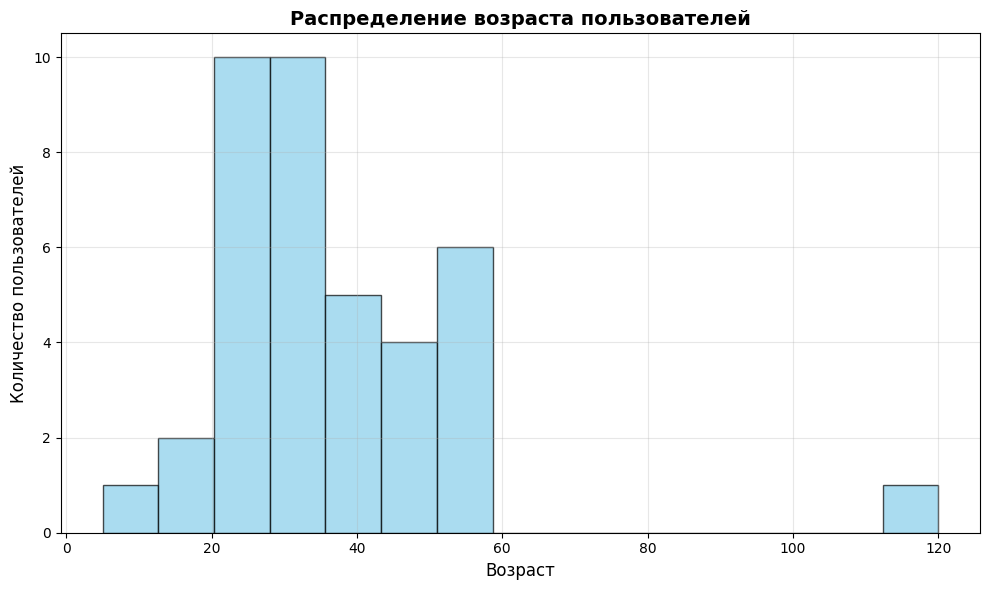

✓ Гистограмма распределения возраста сохранена в figures/age_distribution.png


/tmp/ipython-input-2550332078.py:139: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=df['country'].unique())


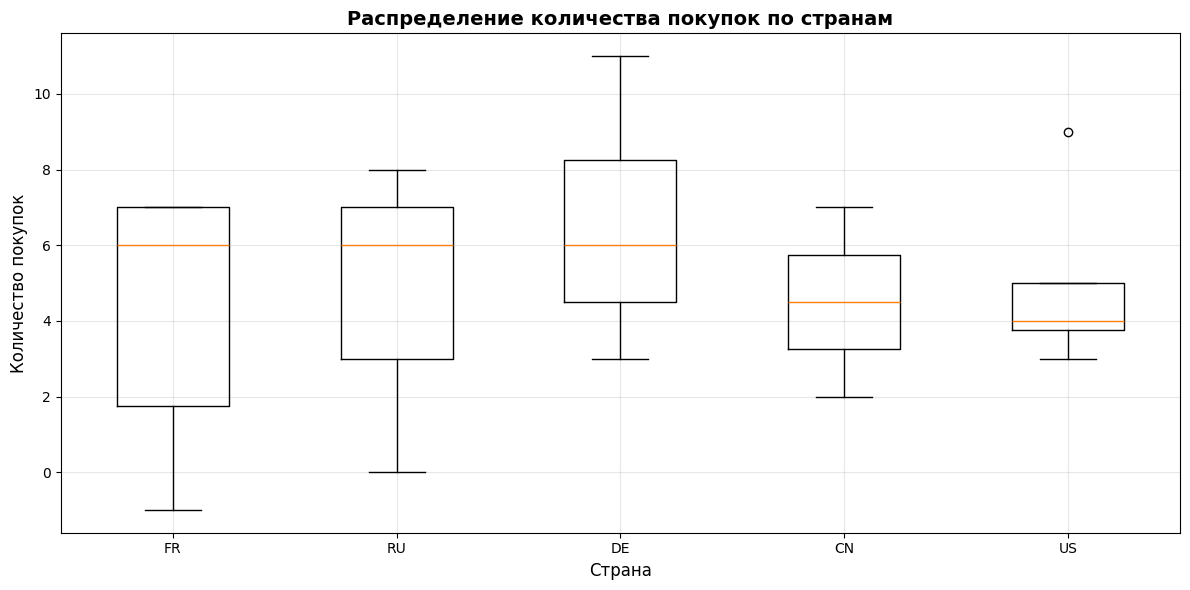

✓ Боксплот покупок по странам сохранен в figures/purchases_by_country_boxplot.png


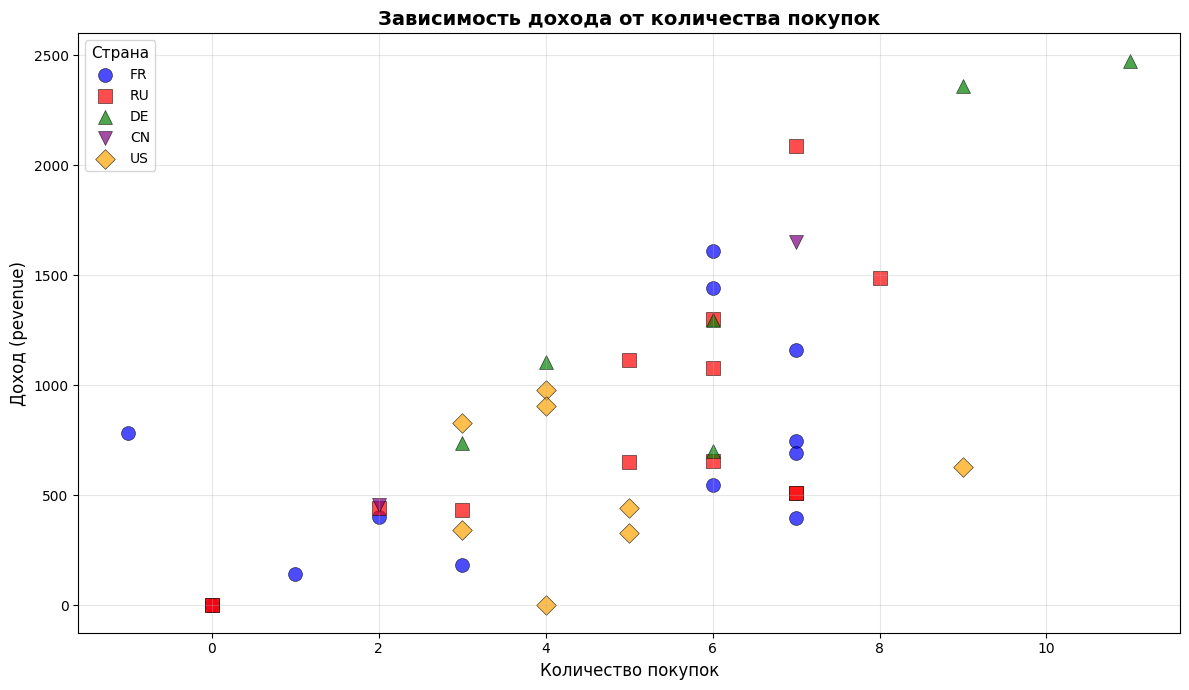

✓ Диаграмма рассеяния сохранена в figures/purchases_vs_revenue_scatter.png


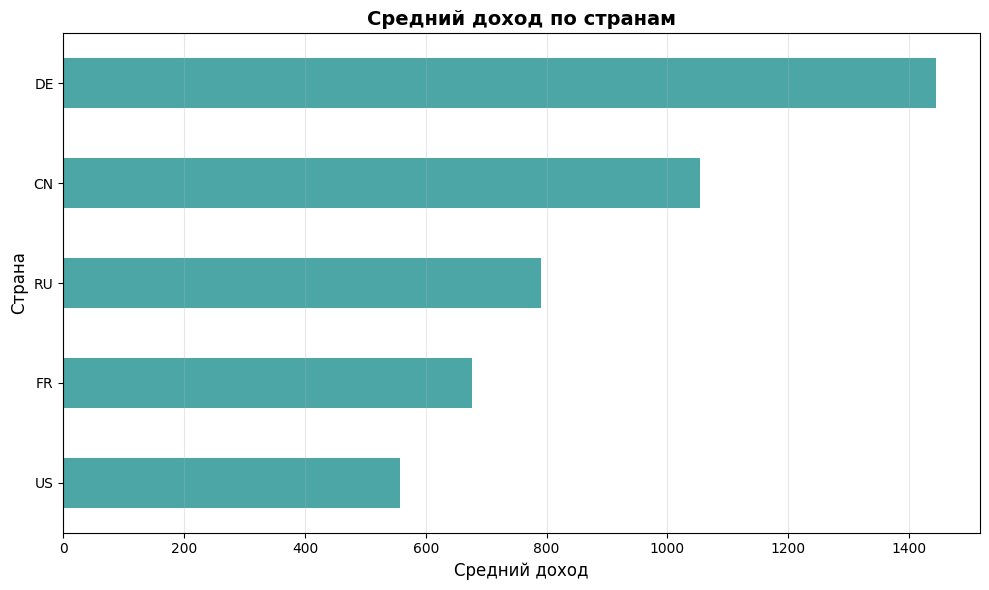

✓ Дополнительный график: средний доход по странам

РЕЗЮМЕ АНАЛИЗА

1. КАЧЕСТВО ДАННЫХ:
----------------------------------------
• Найдено пропусков: 2 в столбце 'age'
• Дубликатов: 1 записей
• Подозрительные значения:
  - Возраст > 100: 1 записей
  - Отрицательные покупки: 1 записей
  - Нулевой доход при покупках: 1 записей

2. ОСНОВНЫЕ СТАТИСТИКИ:
----------------------------------------
• Всего пользователей: 40
• Средний возраст: 36.5 лет
• Среднее количество покупок: 4.83
• Средний доход: 820.05
• Общий доход: 33622

3. РАСПРЕДЕЛЕНИЕ ПО СТРАНАМ:
----------------------------------------
• RU: 13 пользователей (31.7%)
• FR: 12 пользователей (29.3%)
• US: 8 пользователей (19.5%)
• DE: 6 пользователей (14.6%)
• CN: 2 пользователей (4.9%)

4. СОХРАНЕННЫЕ ГРАФИКИ:
----------------------------------------
1. figures/age_distribution.png - распределение возраста
2. figures/purchases_by_country_boxplot.png - боксплот покупок по странам
3. figures/purchases_vs_revenue_scatter.png - диаграмма

In [1]:
# ИМПОРТ БИБЛИОТЕК

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# СОЗДАНИЕ ПАПКИ ДЛЯ ГРАФИКОВ

os.makedirs('figures', exist_ok=True)

# ЗАГРУЗКА ДАННЫХ

df = pd.read_csv('S02-hw-dataset.csv')

# ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ

print("=" * 70)
print("ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ")
print("=" * 70)

print("\n1. Первые 10 строк данных:")
print(df.head(10))

print("\n2. Информация о структуре данных:")
print(df.info())

print("\n3. Описательная статистика:")
print(df.describe())

# ПРОВЕРКА КАЧЕСТВА ДАННЫХ

print("\n" + "=" * 70)
print("ПРОВЕРКА КАЧЕСТВА ДАННЫХ")
print("=" * 70)

# Пропущенные значения
print("\n1. Пропущенные значения:")
missing_data = df.isna().sum()
missing_percentage = (df.isna().mean() * 100).round(2)
missing_df = pd.DataFrame({
    'Пропущено': missing_data,
    'Процент, %': missing_percentage
})
print(missing_df[missing_df['Пропущено'] > 0])

# Дубликаты
print("\n2. Проверка дубликатов:")
duplicate_count = df.duplicated().sum()
print(f"Найдено полных дубликатов: {duplicate_count}")
if duplicate_count > 0:
    print("Дублирующиеся строки:")
    print(df[df.duplicated(keep=False)])

# Подозрительные значения
print("\n3. Подозрительные значения:")

# Возраст > 100
unreal_age = df[df['age'] > 100]
if not unreal_age.empty:
    print(f"Не реалистичный возраст (>100 лет): {len(unreal_age)} записей")
    print(unreal_age[['user_id', 'age']])

# Отрицательные покупки
negative_purchases = df[df['purchases'] < 0]
if not negative_purchases.empty:
    print(f"\nОтрицательное количество покупок: {len(negative_purchases)} записей")
    print(negative_purchases[['user_id', 'purchases']])

# Нулевой доход при ненулевых покупках
zero_revenue = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
if not zero_revenue.empty:
    print(f"\nНулевой доход при наличии покупок: {len(zero_revenue)} записей")
    print(zero_revenue[['user_id', 'purchases', 'revenue']])

# Доход при нулевых покупках
revenue_without_purchases = df[(df['revenue'] > 0) & (df['purchases'] == 0)]
if not revenue_without_purchases.empty:
    print(f"\nПоложительный доход при нулевых покупках: {len(revenue_without_purchases)} записей")
    print(revenue_without_purchases[['user_id', 'purchases', 'revenue']])

# БАЗОВЫЙ EDA: ГРУППИРОВКИ И АГРЕГАЦИИ

print("\n" + "=" * 70)
print("БАЗОВЫЙ АНАЛИЗ ДАННЫХ (EDA)")
print("=" * 70)

# Распределение по странам
print("\n1. Распределение пользователей по странам:")
country_dist = df['country'].value_counts()
print(country_dist)

# Статистика по странам
print("\n2. Статистика по странам:")
country_stats = df.groupby('country').agg({
    'age': ['mean', 'median', 'count'],
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
}).round(2)
print(country_stats)

# Создание возрастных групп
print("\n3. Анализ по возрастным группам:")
df['age_group'] = pd.cut(df['age'],
                         bins=[0, 20, 30, 40, 50, 60, 120],
                         labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])

age_group_stats = df.groupby('age_group').agg({
    'user_id': 'count',
    'age': 'mean',
    'purchases': 'mean',
    'revenue': 'mean'
}).round(2)
print(age_group_stats)

# ВИЗУАЛИЗАЦИЯ ДАННЫХ

print("\n" + "=" * 70)
print("ВИЗУАЛИЗАЦИЯ ДАННЫХ")
print("=" * 70)

# 1. ГИСТОГРАММА распределения возраста
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Распределение возраста пользователей', fontsize=14, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Гистограмма распределения возраста сохранена в figures/age_distribution.png")

# 2. БОКСПЛОТ покупок по странам
plt.figure(figsize=(12, 6))
# Удаляем строки с пропусками в возрасте для boxplot
boxplot_data = [df[df['country'] == country]['purchases'].dropna()
                for country in df['country'].unique()]
plt.boxplot(boxplot_data, labels=df['country'].unique())
plt.title('Распределение количества покупок по странам', fontsize=14, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество покупок', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/purchases_by_country_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Боксплот покупок по странам сохранен в figures/purchases_by_country_boxplot.png")

# 3. ДИАГРАММА РАССЕЯНИЯ покупки vs доход
plt.figure(figsize=(12, 7))
# Создаем цветовую схему для стран
colors = {'FR': 'blue', 'RU': 'red', 'DE': 'green', 'US': 'orange', 'CN': 'purple'}
markers = {'FR': 'o', 'RU': 's', 'DE': '^', 'US': 'D', 'CN': 'v'}

for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.scatter(country_data['purchases'],
                country_data['revenue'],
                label=country,
                color=colors.get(country, 'gray'),
                marker=markers.get(country, 'o'),
                alpha=0.7,
                s=100,  # Размер точек
                edgecolors='black',
                linewidth=0.5)

plt.title('Зависимость дохода от количества покупок', fontsize=14, fontweight='bold')
plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Доход (реvenue)', fontsize=12)
plt.legend(title='Страна', fontsize=10, title_fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/purchases_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Диаграмма рассеяния сохранена в figures/purchases_vs_revenue_scatter.png")

# Дополнительная визуализация: средний доход по странам
plt.figure(figsize=(10, 6))
avg_revenue_by_country = df.groupby('country')['revenue'].mean().sort_values(ascending=True)
avg_revenue_by_country.plot(kind='barh', color='teal', alpha=0.7)
plt.title('Средний доход по странам', fontsize=14, fontweight='bold')
plt.xlabel('Средний доход', fontsize=12)
plt.ylabel('Страна', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('figures/avg_revenue_by_country.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Дополнительный график: средний доход по странам")

# ВЫВОДЫ И РЕЗЮМЕ

print("\n" + "=" * 70)
print("РЕЗЮМЕ АНАЛИЗА")
print("=" * 70)

print("\n1. КАЧЕСТВО ДАННЫХ:")
print("-" * 40)
print(f"• Найдено пропусков: {df['age'].isna().sum()} в столбце 'age'")
print(f"• Дубликатов: {duplicate_count} записей")
print(f"• Подозрительные значения:")
print(f"  - Возраст > 100: {len(unreal_age)} записей")
print(f"  - Отрицательные покупки: {len(negative_purchases)} записей")
print(f"  - Нулевой доход при покупках: {len(zero_revenue)} записей")

print("\n2. ОСНОВНЫЕ СТАТИСТИКИ:")
print("-" * 40)
print(f"• Всего пользователей: {df['user_id'].nunique()}")
print(f"• Средний возраст: {df['age'].mean():.1f} лет")
print(f"• Среднее количество покупок: {df['purchases'].mean():.2f}")
print(f"• Средний доход: {df['revenue'].mean():.2f}")
print(f"• Общий доход: {df['revenue'].sum()}")

print("\n3. РАСПРЕДЕЛЕНИЕ ПО СТРАНАМ:")
print("-" * 40)
for country, count in country_dist.items():
    percentage = (count / len(df) * 100)
    print(f"• {country}: {count} пользователей ({percentage:.1f}%)")

print("\n4. СОХРАНЕННЫЕ ГРАФИКИ:")
print("-" * 40)
print("1. figures/age_distribution.png - распределение возраста")
print("2. figures/purchases_by_country_boxplot.png - боксплот покупок по странам")
print("3. figures/purchases_vs_revenue_scatter.png - диаграмма рассеяния")
print("4. figures/avg_revenue_by_country.png - средний доход по странам")

# ОЧИСТКА ДАННЫХ (ДОПОЛНИТЕЛЬНО)

print("\n" + "=" * 70)
print("РЕКОМЕНДАЦИИ ПО ОЧИСТКЕ ДАННЫХ")
print("=" * 70)

# Создание очищенной версии данных
df_clean = df.copy()

# Удаление дубликатов
df_clean = df_clean.drop_duplicates()

# Обработка пропусков в возрасте - заполнение медианой
median_age = df_clean['age'].median()
df_clean['age'] = df_clean['age'].fillna(median_age)

# Исправление подозрительных значений
# 1. Возраст > 100 заменяем на медиану
df_clean.loc[df_clean['age'] > 100, 'age'] = median_age

# 2. Отрицательные покупки заменяем на 0
df_clean.loc[df_clean['purchases'] < 0, 'purchases'] = 0

# Сохранение очищенных данных
df_clean.to_csv('S02-hw-dataset_cleaned.csv', index=False)
print("✓ Очищенные данные сохранены в S02-hw-dataset_cleaned.csv")

print("\n" + "=" * 70)
print("АНАЛИЗ ЗАВЕРШЕН УСПЕШНО!")
print("=" * 70)